# KNN Classification

In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/getpeped/K-Nearest-Neighbors/main/Implementation/data_knn_class.csv'
df = pd.read_csv(url)
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


### Data preperation: segregation, scaling and splitting into test and training data

In [2]:
df.isna().sum()
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=56, stratify=y)

### Implementing KNN Classifier

In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import f1_score
print(f'F1 Score is equal to: {round(f1_score(y_test, y_pred), 5)}')

F1 Score is equal to: 0.7


### Elbow for Classifier

In [4]:
def Elbow(k):
    error_list = []
    
    for i in k:
        scaler = KNeighborsClassifier(n_neighbors=i)
        scaler.fit(X_train, y_train)
        test = scaler.predict(X_test)
        k = f1_score(y_test, test)
        error = 1-k
        error_list.append(error)
    return error_list

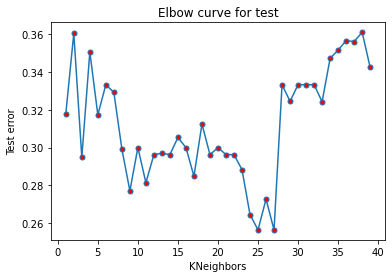

In [5]:
k = range(1, 40)
error = Elbow(k)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(k, error, marker='o', markersize=5, markerfacecolor='r')
ax.set(xlabel='KNeighbors', ylabel='Test error', title='Elbow curve for test')
plt.show()

### Determining the optimal KNeighbors factor

In [6]:
# np.argsort sorts an array and returns an array of indicies
k = np.argsort(error)[0]

clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'F1 Score is equal to: {round(f1_score(y_test, y_pred), 5)}')

F1 Score is equal to: 0.72727


              precision    recall  f1-score   support

Not Survived       0.81      0.91      0.86       137
    Survived       0.82      0.65      0.73        86

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.81       223



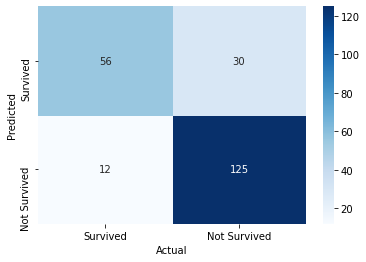

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
conf_m = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
ax = sns.heatmap(conf_m, cmap='Blues', annot=True, fmt='d', 
                 xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
ax.set(xlabel='Actual', ylabel='Predicted')
ax.invert_xaxis()
ax.invert_yaxis()

target_names = ['Not Survived', 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))

# KNN Regression

In [8]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/getpeped/K-Nearest-Neighbors/main/Implementation/data_knn_regress.csv'
df = pd.read_csv(url)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Data preperation: segregation, scaling and splitting into test and training data

In [9]:
df.isna().sum()

X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

from sklearn.preprocessing import MinMaxScaler
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=56)

### Implementing KNN Regressor

In [10]:
from sklearn.neighbors import KNeighborsRegressor
rgs = KNeighborsRegressor(n_neighbors=5)
rgs.fit(X_train, y_train)
y_pred = rgs.predict(X_test)

from sklearn.metrics import mean_squared_error
print(f'RMSE: {round(mean_squared_error(y_test, y_pred, squared=True), 5)}')

RMSE: 1714854.6015


### Elbow for Regressor

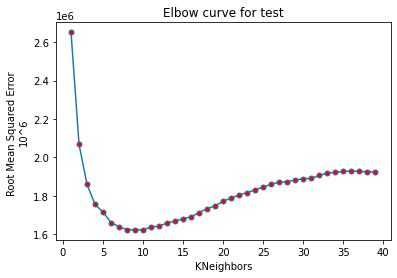

In [11]:
def Elbow(k):
    error_list = []
    
    for i in k:
        rgs = KNeighborsRegressor(n_neighbors=i)
        rgs.fit(X_train, y_train)
        tmp = rgs.predict(X_test)
        rmse = mean_squared_error(y_test, tmp, squared=True)
        error_list.append(rmse)
    return error_list

k = range(1,40)
error = Elbow(k)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(k, error, marker='o', markersize=5, markerfacecolor='r')
ax.set(xlabel='KNeighbors', ylabel='Root Mean Squared Error \n10^6', title='Elbow curve for test')
plt.show()

### Determining the optimal K-Neighbors factor

In [12]:
k = np.argsort(error)[0]
rgs = KNeighborsRegressor(n_neighbors=k)
rgs.fit(X_train, y_train)
y_pred = rgs.predict(X_test)
print(f'RMSE is equal to: {round(mean_squared_error(y_test, y_pred, squared=True), 5)}')
print(f'\ta relatively small difference between the RMSE on the training and the test data. \n\t==> the model does not suffer from overfitting on the training data')

RMSE is equal to: 1622957.61575
	a relatively small difference between the RMSE on the training and the test data. 
	==> the model does not suffer from overfitting on the training data
